In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [33]:
stock=input("Enter Stock Symbol")
start=input("Enter start date in YYYY-MM-DD")
end=input("Enter end date in YYYY-MM-DD")

data=yf.download(stock,start,end)


[*********************100%%**********************]  1 of 1 completed


In [34]:
data.reset_index(inplace=True)


In [35]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-01,35.000000,37.000000,32.099998,36.200001,33.839130,14667600
1,2013-11-04,36.799999,36.799999,34.689999,35.349998,33.044563,1586600
2,2013-11-05,35.110001,35.500000,34.820000,35.349998,33.044563,337700
3,2013-11-06,35.610001,36.490002,35.610001,35.900002,33.558697,549600
4,2013-11-07,36.799999,36.799999,34.119999,35.310001,33.007175,883700
...,...,...,...,...,...,...,...
2539,2023-12-05,2.090000,2.120000,2.000000,2.000000,2.000000,123000
2540,2023-12-06,2.010000,2.120000,1.990000,2.010000,2.010000,134700
2541,2023-12-07,2.000000,2.040000,1.960000,1.960000,1.960000,148200
2542,2023-12-08,1.990000,2.000000,1.920000,1.960000,1.960000,134800


In [36]:
ma_100_days = data.Close.rolling(100).mean()


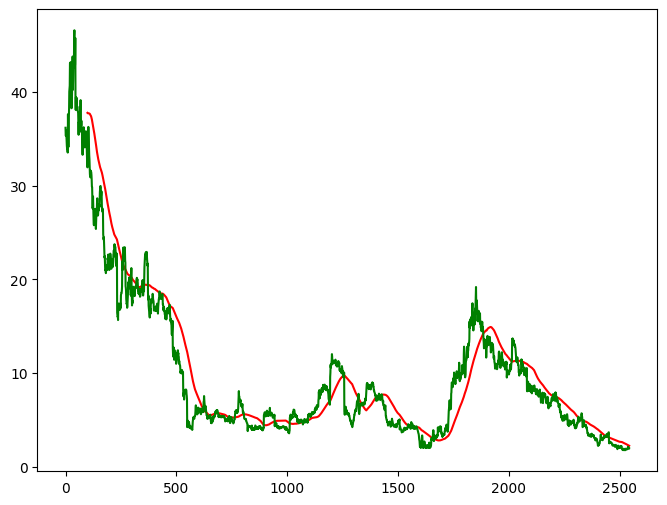

In [37]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [38]:
ma_200_days = data.Close.rolling(200).mean()

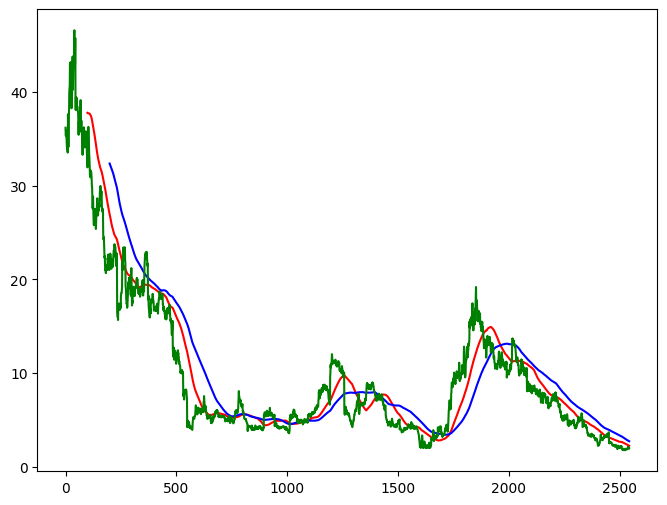

In [39]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close, 'g')
plt.show()

In [40]:
data.dropna(inplace=True)


In [41]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [42]:
data_train.shape[0]


2035

In [43]:
data_test.shape[0]

509

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [45]:
data_train_scale = scaler.fit_transform(data_train)

In [46]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [47]:
x, y = np.array(x), np.array(y)

In [48]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu' , return_sequences = True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu' ,return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\presh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [51]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - loss: 0.0240
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - loss: 0.0030
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0023
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - loss: 0.0024
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - loss: 0.0020
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0020
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - loss: 0.0018
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - loss: 0.0017
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - loss: 0.0018
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - loss: 0.0018
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - loss: 0.0017
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - loss: 0.0019
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 236ms/step - loss: 0.0017
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 269ms/step - loss: 0.0013
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [53]:
pas_100_days = data_train.tail(100)


In [54]:
data_test = pd.concat([pas_100_days, data_test],ignore_index=True)

In [55]:
data_test_scale=scaler.fit_transform(data_test)

In [56]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y= np.array(x), np.array(y)

In [57]:
y_predict=model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step


In [58]:
scale=1/scaler.scale_

In [59]:
y_predict=y_predict*scale

In [60]:
y=y*scale

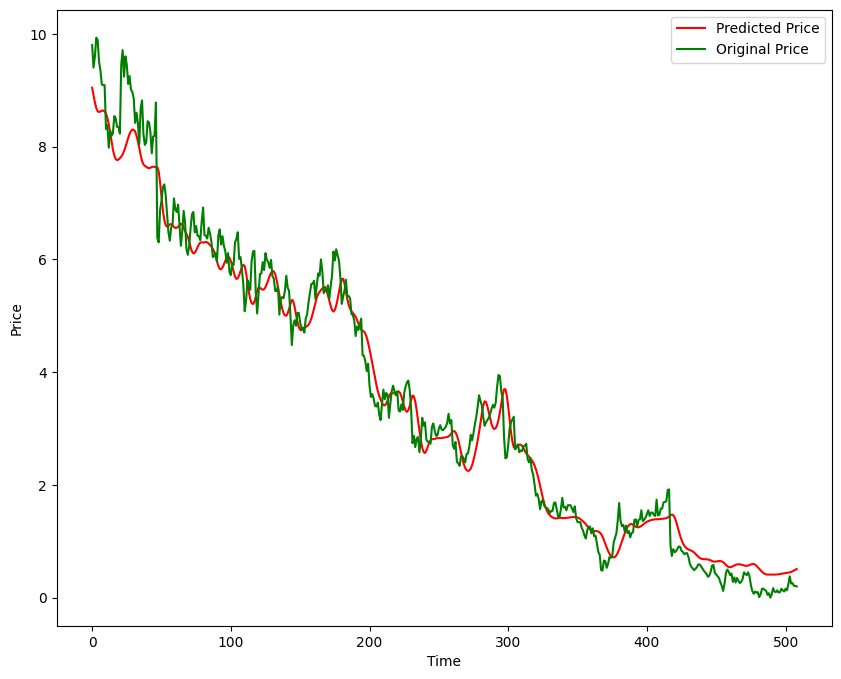

In [61]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y , 'g', label= 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [62]:
model.save('Stock Prediction Model.keras')